In [1]:
#|export
from fastai.vision.all import *

In [2]:
#|export
import gradio as gr

In [4]:
#|export
def is_cat(x): return x[0].isupper()

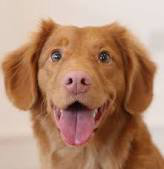

In [3]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [6]:
#|export

# Do this to fix NotImplementedError: cannot instantiate 'PosixPath' on your system
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [7]:
#|export
learn = load_learner('model.pkl')

In [8]:
learn.predict(im)

('False', TensorBase(0), TensorBase([1.0000e+00, 4.9128e-08]))

In [9]:
#|export
categories = ('Dog','Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [11]:
%time classify_image(im)

Wall time: 47.7 ms


{'Dog': 1.0, 'Cat': 4.912791951028339e-08}

In [12]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg']

C:\Users\Ankush\anaconda3\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Ankush\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Ankush\anaconda3\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\Ankush\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [13]:
#|export
intf = gr.Interface(fn = classify_image, inputs = image, outputs = label, examples = examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x14b0f01e130>, 'http://127.0.0.1:7860/', None)